In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score


In [3]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

Question 1(a): Marginal and Conditional Distributions


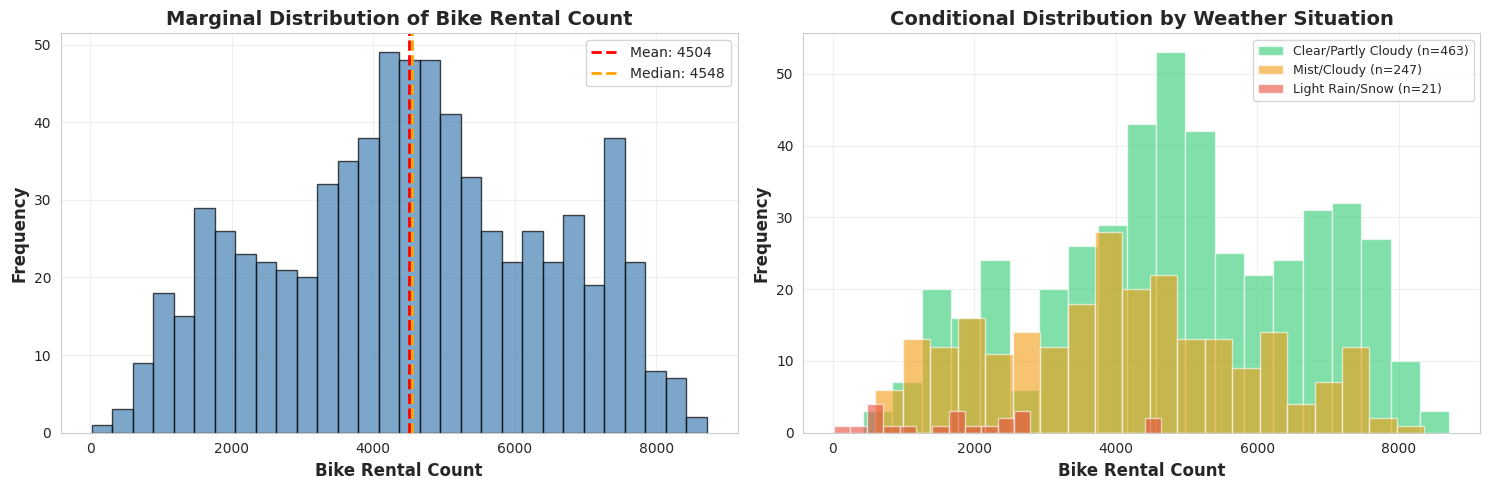

In [4]:
# ===== Question 1(a): Plot Distributions =====
print("="*60)
print("Question 1(a): Marginal and Conditional Distributions")
print("="*60)

# Load data
df = pd.read_csv(r'/content/drive/MyDrive/Bike-Sharing-Dataset/day.csv')

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Marginal distribution of cnt
axes[0].hist(df['cnt'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Bike Rental Count', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Marginal Distribution of Bike Rental Count', fontsize=14, fontweight='bold')
axes[0].axvline(df['cnt'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["cnt"].mean():.0f}')
axes[0].axvline(df['cnt'].median(), color='orange', linestyle='--', linewidth=2,
                label=f'Median: {df["cnt"].median():.0f}')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Right plot: Conditional distribution by weather situation
weather_labels = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

colors = ['#2ecc71', '#f39c12', '#e74c3c', '#8e44ad']

for idx, weather in enumerate(sorted(df['weathersit'].unique())):
    subset = df[df['weathersit'] == weather]['cnt']
    label = weather_labels.get(weather, f'Weather {weather}')
    axes[1].hist(subset, bins=20, alpha=0.6,
                 label=f'{label} (n={len(subset)})',
                 color=colors[idx] if idx < len(colors) else None)

axes[1].set_xlabel('Bike Rental Count', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Conditional Distribution by Weather Situation', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q1a_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# ===== Question 1(b): Linear Regression =====
print("="*60)
print("Question 1(b): Linear Regression")
print("="*60)


# Modeling approach: Treat weathersit as categorical variable
# Use dummy variables with weathersit=1 as reference category
X_weather = pd.get_dummies(df['weathersit'], prefix='weather', drop_first=True)
y = df['cnt']

print("\nModeling Approach:")
print("- weathersit is CATEGORICAL (not numeric)")
print("- Use DUMMY VARIABLES (one-hot encoding)")
print("- Reference category: weathersit=1 (Clear weather)")
print(f"- Dummy columns created: {X_weather.columns.tolist()}")

# Fit model
model = LinearRegression()
model.fit(X_weather, y)

# Report coefficients
print("\n" + "-"*60)
print("Model Coefficients:")
print("-"*60)
print(f"Intercept: {model.intercept_:.2f}")
print(f"  → Expected count for weathersit=1 (Clear)")

for i, col in enumerate(X_weather.columns):
    weather_num = col.split('_')[1]
    print(f"\n{col}: {model.coef_[i]:.2f}")
    print(f"  → Difference from Clear to weathersit={weather_num}")

# Expected counts by weather
print("\n" + "-"*60)
print("Expected Rental Counts:")
print("-"*60)
print(f"weathersit=1 (Clear): {model.intercept_:.2f}")
for i, col in enumerate(X_weather.columns):
    weather_num = int(col.split('_')[1])
    expected = model.intercept_ + model.coef_[i]
    print(f"weathersit={weather_num}: {expected:.2f}")

print("\n" + "="*60)

Question 1(b): Linear Regression

Modeling Approach:
- weathersit is CATEGORICAL (not numeric)
- Use DUMMY VARIABLES (one-hot encoding)
- Reference category: weathersit=1 (Clear weather)
- Dummy columns created: ['weather_2', 'weather_3']

------------------------------------------------------------
Model Coefficients:
------------------------------------------------------------
Intercept: 4876.79
  → Expected count for weathersit=1 (Clear)

weather_2: -840.92
  → Difference from Clear to weathersit=2

weather_3: -3073.50
  → Difference from Clear to weathersit=3

------------------------------------------------------------
Expected Rental Counts:
------------------------------------------------------------
weathersit=1 (Clear): 4876.79
weathersit=2: 4035.86
weathersit=3: 1803.29



In [6]:
# ===== Question 1(c): Difference between Clear (1) and Wet (3) =====
print("="*60)
print("Question 1(c): Expected Ride Count Difference")
print("="*60)

# Create dummy variables (same as part b)
X_weather = pd.get_dummies(df['weathersit'], prefix='weather', drop_first=True)
y = df['cnt']

# Fit model
model = LinearRegression()
model.fit(X_weather, y)

# Calculate expected counts
expected_clear = model.intercept_  # weathersit=1 (reference)

# Find coefficient for weathersit=3
if 'weather_3' in X_weather.columns:
    coef_3_index = X_weather.columns.tolist().index('weather_3')
    expected_wet = model.intercept_ + model.coef_[coef_3_index]

    difference = expected_clear - expected_wet

    print("\nExpected rental counts:")
    print(f"  Clear weather (weathersit=1): {expected_clear:.2f} bikes")
    print(f"  Wet weather (weathersit=3):   {expected_wet:.2f} bikes")
    print(f"\nDifference: {difference:.2f} bikes")
    print(f"\nInterpretation:")
    print(f"Clear weather is expected to have {difference:.2f} more rentals")
    print(f"than wet weather (light rain/snow).")
else:
    print("\nNote: weathersit=3 not found in data or has no observations.")

print("\n" + "="*60)

Question 1(c): Expected Ride Count Difference

Expected rental counts:
  Clear weather (weathersit=1): 4876.79 bikes
  Wet weather (weathersit=3):   1803.29 bikes

Difference: 3073.50 bikes

Interpretation:
Clear weather is expected to have 3073.50 more rentals
than wet weather (light rain/snow).



In [7]:
# ===== Question 1(d): Model Evaluation Metrics =====
print("="*60)
print("Question 1(d): RSS, R², and Residual Standard Error")
print("="*60)

# Use the model from part (b)
y_pred = model.predict(X_weather)
residuals = y - y_pred

# 1. Residual Sum of Squares (RSS)
RSS = np.sum(residuals**2)

# 2. Total Sum of Squares (TSS)
TSS = np.sum((y - y.mean())**2)

# 3. R² (Coefficient of Determination)
R2 = 1 - (RSS / TSS)

# 4. Residual Standard Error
n = len(y)
p = X_weather.shape[1]  # number of predictors
residual_std_error = np.sqrt(RSS / (n - p - 1))

print("\n" + "-"*60)
print("Model Evaluation Metrics:")
print("-"*60)
print(f"Residual Sum of Squares (RSS): {RSS:.2f}")
print(f"Total Sum of Squares (TSS):    {TSS:.2f}")
print(f"R² (R-squared):                {R2:.4f}")
print(f"Residual Standard Error:       {residual_std_error:.2f}")


Question 1(d): RSS, R², and Residual Standard Error

------------------------------------------------------------
Model Evaluation Metrics:
------------------------------------------------------------
Residual Sum of Squares (RSS): 2467890819.44
Total Sum of Squares (TSS):    2739535392.05
R² (R-squared):                0.0992
Residual Standard Error:       1841.18


In [8]:
# ===== Question 1(e): Multiple Linear Regression =====
print("="*60)
print("Question 1(e): Multiple Linear Regression (All Weather Variables)")
print("="*60)

# Prepare feature matrix: weathersit as dummy + continuous variables
X_weather_dummy = pd.get_dummies(df['weathersit'], prefix='weather', drop_first=True)
X_all = pd.concat([X_weather_dummy, df[['temp', 'hum', 'windspeed']]], axis=1)

# Fit multiple regression model
model_all = LinearRegression()
model_all.fit(X_all, y)

# Temperature impact analysis
print("\n" + "-"*60)
print("Temperature Impact Analysis:")
print("-"*60)

temp_coef = model_all.coef_[X_all.columns.tolist().index('temp')]
print(f"\nTemperature coefficient: {temp_coef:.2f}")
print(f"\nFor 10°C increase in actual temperature:")
print(f"  - Normalized temp increase: 10/41 = {10/41:.4f}")
print(f"  - Expected count increase: {temp_coef:.2f} × {10/41:.4f} = {temp_coef * (10/41):.2f} bikes")

print(f"\nInterpretation:")
print(f"A 10-degree Celsius increase in temperature is associated with")
print(f"an expected increase of {temp_coef * (10/41):.2f} bike rentals,")
print(f"holding other variables constant.")

print("\n" + "="*60)

Question 1(e): Multiple Linear Regression (All Weather Variables)

------------------------------------------------------------
Temperature Impact Analysis:
------------------------------------------------------------

Temperature coefficient: 6395.16

For 10°C increase in actual temperature:
  - Normalized temp increase: 10/41 = 0.2439
  - Expected count increase: 6395.16 × 0.2439 = 1559.79 bikes

Interpretation:
A 10-degree Celsius increase in temperature is associated with
an expected increase of 1559.79 bike rentals,
holding other variables constant.



In [9]:
# ===== Question 1(f): Logistic Regression (threshold=4000) =====
print("="*60)
print("Question 1(f): Logistic Regression with threshold=4000")
print("="*60)



# Create binary labels: Low Demand (≤4000) vs High Demand (>4000)
threshold = 4000
df['demand'] = (df['cnt'] > threshold).astype(int)

print(f"\nThreshold: {threshold}")
print(f"Low Demand (cnt ≤ {threshold}):  {(df['demand']==0).sum()} samples ({(df['demand']==0).sum()/len(df)*100:.1f}%)")
print(f"High Demand (cnt > {threshold}): {(df['demand']==1).sum()} samples ({(df['demand']==1).sum()/len(df)*100:.1f}%)")

# Prepare features: weathersit as dummy + continuous variables
X_weather_dummy = pd.get_dummies(df['weathersit'], prefix='weather', drop_first=True)
X = pd.concat([X_weather_dummy, df[['temp', 'hum', 'windspeed']]], axis=1)
y_binary = df['demand']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, random_state=42
)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size:  {len(X_test)}")



log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n" + "-"*60)
print("Model Performance:")
print("-"*60)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy:     {test_accuracy:.4f}")


Question 1(f): Logistic Regression with threshold=4000

Threshold: 4000
Low Demand (cnt ≤ 4000):  279 samples (38.2%)
High Demand (cnt > 4000): 452 samples (61.8%)

Train set size: 511
Test set size:  220

------------------------------------------------------------
Model Performance:
------------------------------------------------------------
Training accuracy: 0.8395
Test accuracy:     0.8045


In [10]:
# ===== Question 1(g): Logistic Regression (custom threshold) =====
print("="*60)
print("Question 1(g): Logistic Regression with Custom Threshold")
print("="*60)

# Choose criterion: Use MEDIAN for balanced classes
new_threshold = df['cnt'].median()

print("\nThreshold Selection Criterion:")
print("Using MEDIAN to create balanced classes")
print("- Median naturally splits data into two equal-sized groups")
print("- Balanced classes help avoid model bias toward majority class")
print("- Improves model's ability to learn both classes equally")

print(f"\nNew threshold (median): {new_threshold:.0f}")

# Create new binary labels
df['demand_new'] = (df['cnt'] > new_threshold).astype(int)

print(f"\nClass distribution with new threshold:")
print(f"Low Demand (cnt ≤ {new_threshold:.0f}):  {(df['demand_new']==0).sum()} samples ({(df['demand_new']==0).sum()/len(df)*100:.1f}%)")
print(f"High Demand (cnt > {new_threshold:.0f}): {(df['demand_new']==1).sum()} samples ({(df['demand_new']==1).sum()/len(df)*100:.1f}%)")

# Compare with previous threshold
print(f"\nComparison with previous threshold ({threshold}):")
print(f"Previous - Low: {(df['demand']==0).sum()} ({(df['demand']==0).sum()/len(df)*100:.1f}%), High: {(df['demand']==1).sum()} ({(df['demand']==1).sum()/len(df)*100:.1f}%)")
print(f"New      - Low: {(df['demand_new']==0).sum()} ({(df['demand_new']==0).sum()/len(df)*100:.1f}%), High: {(df['demand_new']==1).sum()} ({(df['demand_new']==1).sum()/len(df)*100:.1f}%)")
print("→ New threshold creates more balanced classes")

# Train-test split with new labels
y_binary_new = df['demand_new']
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X, y_binary_new, test_size=0.3, random_state=42
)

# Fit logistic regression
log_model_g = LogisticRegression(max_iter=1000, random_state=42)
log_model_g.fit(X_train_g, y_train_g)

# Predictions
y_train_pred_g = log_model_g.predict(X_train_g)
y_test_pred_g = log_model_g.predict(X_test_g)

# Evaluate
train_accuracy_g = accuracy_score(y_train_g, y_train_pred_g)
test_accuracy_g = accuracy_score(y_test_g, y_test_pred_g)
train_f1_g = f1_score(y_train_g, y_train_pred_g)
test_f1_g = f1_score(y_test_g, y_test_pred_g)

print("\n" + "-"*60)
print("Model Performance (New Threshold):")
print("-"*60)
print(f"Training accuracy: {train_accuracy_g:.4f}")
print(f"Test accuracy:     {test_accuracy_g:.4f}")
print(f"Training F1-score: {train_f1_g:.4f}")
print(f"Test F1-score:     {test_f1_g:.4f}")


# Also calculate metrics for previous model (f)
train_f1_f = f1_score(y_train, y_train_pred)
test_f1_f = f1_score(y_test, y_test_pred)

# Comparison table
print("\n" + "="*60)
print("COMPARISON: Model (f) vs Model (g)")
print("="*60)
print(f"\n{'Metric':<20} {'Model (f)':<15} {'Model (g)':<15} {'Difference':<15}")
print("-"*65)
print(f"{'Threshold':<20} {threshold:<15} {new_threshold:<15.0f} {'-':<15}")
print(f"{'Test Accuracy':<20} {test_accuracy:<15.4f} {test_accuracy_g:<15.4f} {test_accuracy_g-test_accuracy:+.4f}")
print(f"{'Test F1-score':<20} {test_f1_f:<15.4f} {test_f1_g:<15.4f} {test_f1_g-test_f1_f:+.4f}")

print("\n" + "-"*60)
print("Performance Analysis:")
print("-"*60)


print(f"✗ Accuracy decreased by {(test_accuracy-test_accuracy_g)*100:.2f}%")
print(f"✗ F1-score decreased by {(test_f1_f-test_f1_g)*100:.2f}%")

print("\n" + "-"*60)
print("Rationale for Performance Change:")
print("-"*60)

print("The threshold=4000 may better capture true 'high demand':")
print("- Higher threshold creates more meaningful separation")
print("- May align better with business definition of 'high demand'")
print("- Trade-off between statistical balance and practical relevance")

Question 1(g): Logistic Regression with Custom Threshold

Threshold Selection Criterion:
Using MEDIAN to create balanced classes
- Median naturally splits data into two equal-sized groups
- Balanced classes help avoid model bias toward majority class
- Improves model's ability to learn both classes equally

New threshold (median): 4548

Class distribution with new threshold:
Low Demand (cnt ≤ 4548):  366 samples (50.1%)
High Demand (cnt > 4548): 365 samples (49.9%)

Comparison with previous threshold (4000):
Previous - Low: 279 (38.2%), High: 452 (61.8%)
New      - Low: 366 (50.1%), High: 365 (49.9%)
→ New threshold creates more balanced classes

------------------------------------------------------------
Model Performance (New Threshold):
------------------------------------------------------------
Training accuracy: 0.7750
Test accuracy:     0.8000
Training F1-score: 0.7826
Test F1-score:     0.7800

COMPARISON: Model (f) vs Model (g)

Metric               Model (f)       Model (g) 